In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Data Anaylsis

In [3]:
df.shape

(99492, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Data Quality Issues

1. All the columns are not properly named,one cannot infer from the column names from what they are trying to interepret      so giving all columns a meaningful name. 
2. Zip code is a float object, changing it to string as we don't need to perfrom any mathematical operations on zip code.
3. Converting timeStamp column to datetime object

#### New features to be added in the dataset

1. Extracting reason of emergency call from the title and making a new column named "Reason".
2. Extracting hour,month,day,year from time and creating respective columns.

In [8]:
#creating a copy of original dataset
df_clean=df.copy()
df_clean.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
#renaming the columns
df_clean.rename(columns = {"lat": "latitude", 
                           "lng":"longitude", 
                           "desc": "description",
                            "twp":"township",
                            "addr":"address",
                            "timeStamp":"time"},inplace=True)
df_clean.columns

Index(['latitude', 'longitude', 'description', 'zip', 'title', 'time',
       'township', 'address', 'e'],
      dtype='object')

In [10]:
#changing the type of zip code column and timestamp column
df_clean['zip'] = df_clean['zip'].astype(str)
df_clean['time']=pd.to_datetime(df_clean['time'])
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
latitude       99492 non-null float64
longitude      99492 non-null float64
description    99492 non-null object
zip            99492 non-null object
title          99492 non-null object
time           99492 non-null datetime64[ns]
township       99449 non-null object
address        98973 non-null object
e              99492 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 6.8+ MB


In [11]:
#removing the decimal point from zip column
def change_zip(x):
    x=x[0:5]
    return x
df_clean['zip']= df_clean['zip'].apply(change_zip)
df_clean.head()

,latitude,longitude,description,zip,title,time,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
#extracting reason from title
def make_reason(x):
    x=x.split(':')[0]
    return x
df_clean['Reason']= df_clean['title'].apply(make_reason)
df_clean.head()

,latitude,longitude,description,zip,title,time,township,address,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [13]:
#extracting month,day,year,hour from timestamp column
df_clean['Hour']= df_clean['time'].apply(lambda t: t.hour)
df_clean['Month']= df_clean['time'].apply(lambda t: t.month)
df_clean['Day of Week']= df_clean['time'].apply(lambda t: t.strftime('%A'))
df_clean['Year']= df_clean['time'].apply(lambda t: t.year)
df_clean['Date']= df_clean['time'].apply(lambda x: x.date())
df_clean.head()

,latitude,longitude,description,zip,title,time,township,address,e,Reason,Hour,Month,Day of Week,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015,2015-12-10


### Data Anaylsis and Visualization

In [14]:
df_clean.groupby("Reason")['e'].count()

Reason
EMS        48877
Fire       14920
Traffic    35695
Name: e, dtype: int64

In [15]:
df_clean['township'].unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

In [16]:
df_clean['zip'].unique()

array(['19525', '19446', '19401', 'nan', '19044', '19426', '19438',
       '19462', '19428', '19040', '19027', '18936', '18974', '19031',
       '19403', '19422', '19085', '18964', '19038', '19406', '19468',
       '19010', '19095', '19464', '19444', '19041', '19440', '19405',
       '19002', '19096', '19454', '19465', '19004', '19066', '19072',
       '18041', '19046', '19090', '19012', '19025', '19473', '18073',
       '18969', '18074', '19460', '19001', '18054', '19009', '19006',
       '19035', '19150', '19075', '19034', '19151', '19453', '19003',
       '18914', '19512', '18976', '19120', '18915', '18076', '19477',
       '19087', '18966', '19131', '19128', '19083', '19053', '19475',
       '18960', '19504', '18070', '19492', '18932', '19118', '18092',
       '19490', '19518', '18056', '19119', '19107', '18103', '17752',
       '19111', '18927', '19435', '18951', '19472', '19503', '19126',
       '19505', '19423', '19138', '36107', '18036', '19116', '19139',
       '19129', '19115

In [17]:
df_clean.groupby(['Date','Reason'])['e'].count()

Date        Reason 
2015-12-10  EMS         57
            Fire        15
            Traffic     43
2015-12-11  EMS        186
            Fire        69
            Traffic    141
2015-12-12  EMS        189
            Fire        68
            Traffic    146
2015-12-13  EMS        190
            Fire        51
            Traffic     78
2015-12-14  EMS        222
            Fire        39
            Traffic    186
2015-12-15  EMS        195
            Fire        43
            Traffic    183
2015-12-16  EMS        192
            Fire        53
            Traffic    132
2015-12-17  EMS        166
            Fire        55
            Traffic    167
2015-12-18  EMS        164
            Fire        34
            Traffic    148
2015-12-19  EMS        123
            Fire        48
            Traffic    108
                      ... 
2016-08-15  EMS        192
            Fire        54
            Traffic    114
2016-08-16  EMS        213
            Fire        65
        

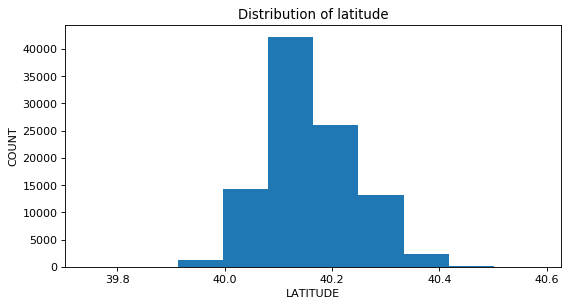

In [18]:
plt.figure(figsize=(8,4), dpi=80)
lat=df_clean[(df_clean['latitude']>39) & (df_clean['latitude']<41)]['latitude']
plt.hist(lat);
plt.xlabel("LATITUDE")
plt.ylabel("COUNT");
plt.title("Distribution of latitude");
plt.show()

> As we can see from above graph majority of emergency calls were made from latitude ranging between 39.8 to 40.5

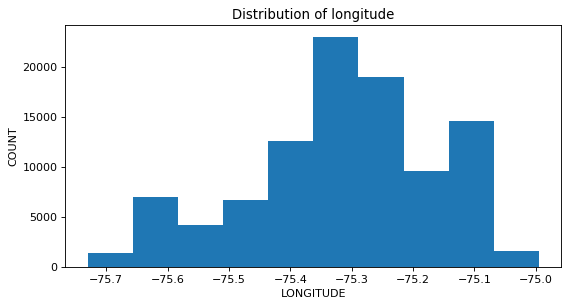

In [19]:
plt.figure(figsize=(8,4), dpi=80)
long=df_clean[(df_clean['longitude']>-76) & (df_clean['longitude']<-74)]['longitude']
plt.hist(long);
plt.xlabel("LONGITUDE")
plt.ylabel("COUNT");
plt.title("Distribution of longitude");

> As it can be visualised from above plot longitudes from where emergency cals were made ranges between -74 to -76.

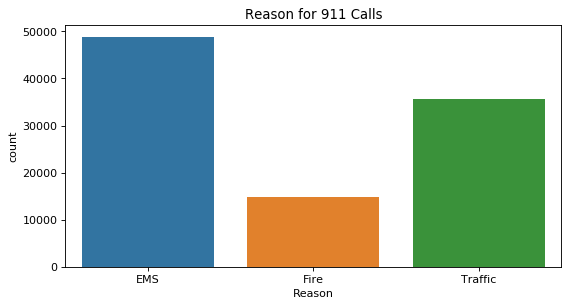

In [20]:
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x='Reason',data=df_clean);
plt.title("Reason for 911 Calls");

> From the visualised graph it is pretty clear that EMS is main cause of 911 calls followed by traffic and them comes fire

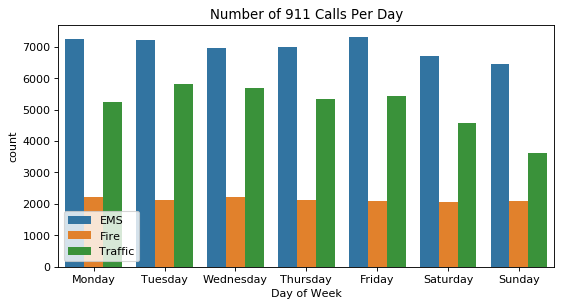

In [21]:
# number of calls based on day of week
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x='Day of Week', hue='Reason',data=df_clean,order=order);
plt.title("Number of 911 Calls Per Day");
plt.legend(loc=3);

> It can be concluded that mre 911 calls were made on weekdays as compared  to weekends with EMS being the top most reason for 911 calss followed by traffic and fire.

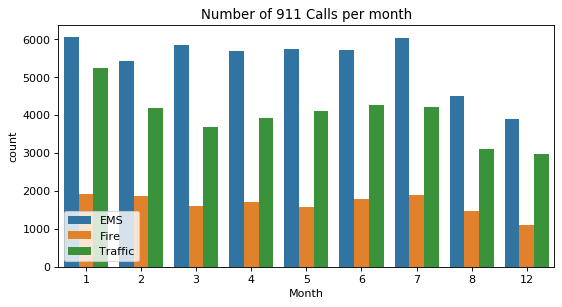

In [22]:
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x='Month', hue='Reason',data=df_clean);
plt.title("Number of 911 Calls per month")
plt.legend(loc=3);

> It can be noted from above graph that no 911 calls were made during September, October and November and EMS being the top most reason for 911 calls.

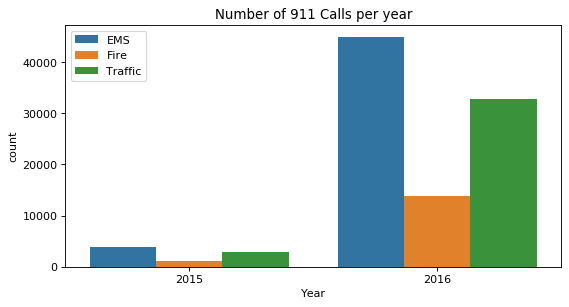

In [23]:
plt.figure(figsize=(8,4), dpi=80)
sns.countplot(x='Year', hue='Reason',data=df_clean);
plt.title("Number of 911 Calls per year")
plt.legend(loc=2);

> A large of 911 calls were made in the year 2016 as compared to year 2015.

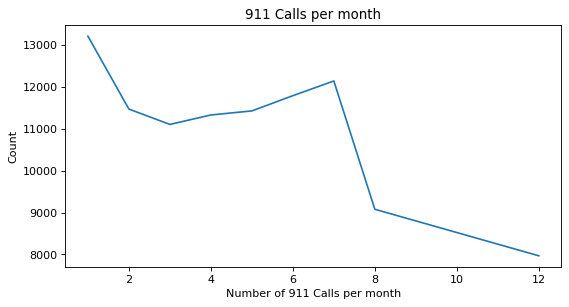

In [24]:
plt.figure(figsize=(8,4), dpi=80)
month=df_clean.groupby('Month').count()
plt.plot(month['e'])
plt.xlabel("Number of 911 Calls per month");
plt.ylabel("Count");
plt.title("911 Calls per month");

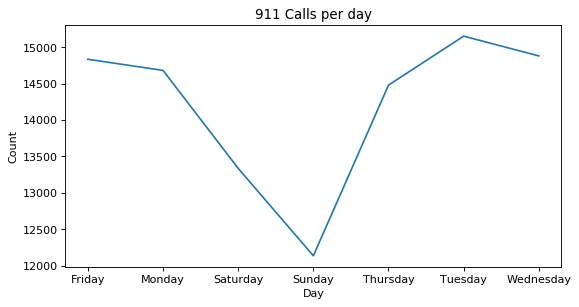

In [25]:
plt.figure(figsize=(8,4), dpi=80)
month=df_clean.groupby('Day of Week').count()
plt.plot(month['e'])
plt.xlabel("Day");
plt.ylabel("Count");
plt.title("911 Calls per day");

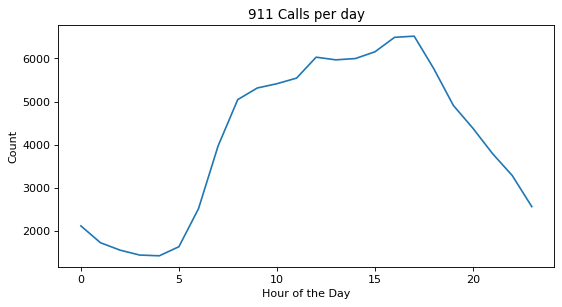

In [26]:
plt.figure(figsize=(8,4), dpi=80)
month=df_clean.groupby('Hour').count()
plt.plot(month['e'])
plt.xlabel("Hour of the Day");
plt.ylabel("Count");
plt.title("911 Calls per day");

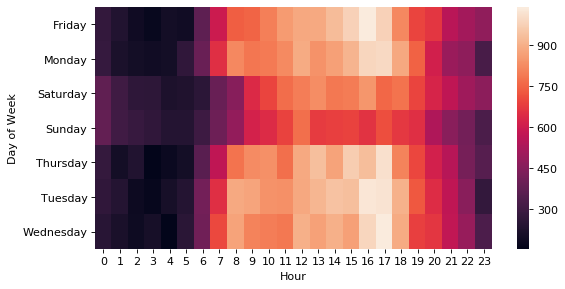

In [27]:
plt.figure(figsize=(8,4), dpi=80)
dayHour = df_clean.groupby(['Day of Week','Hour']).count().unstack()['Reason']
sns.heatmap(dayHour)

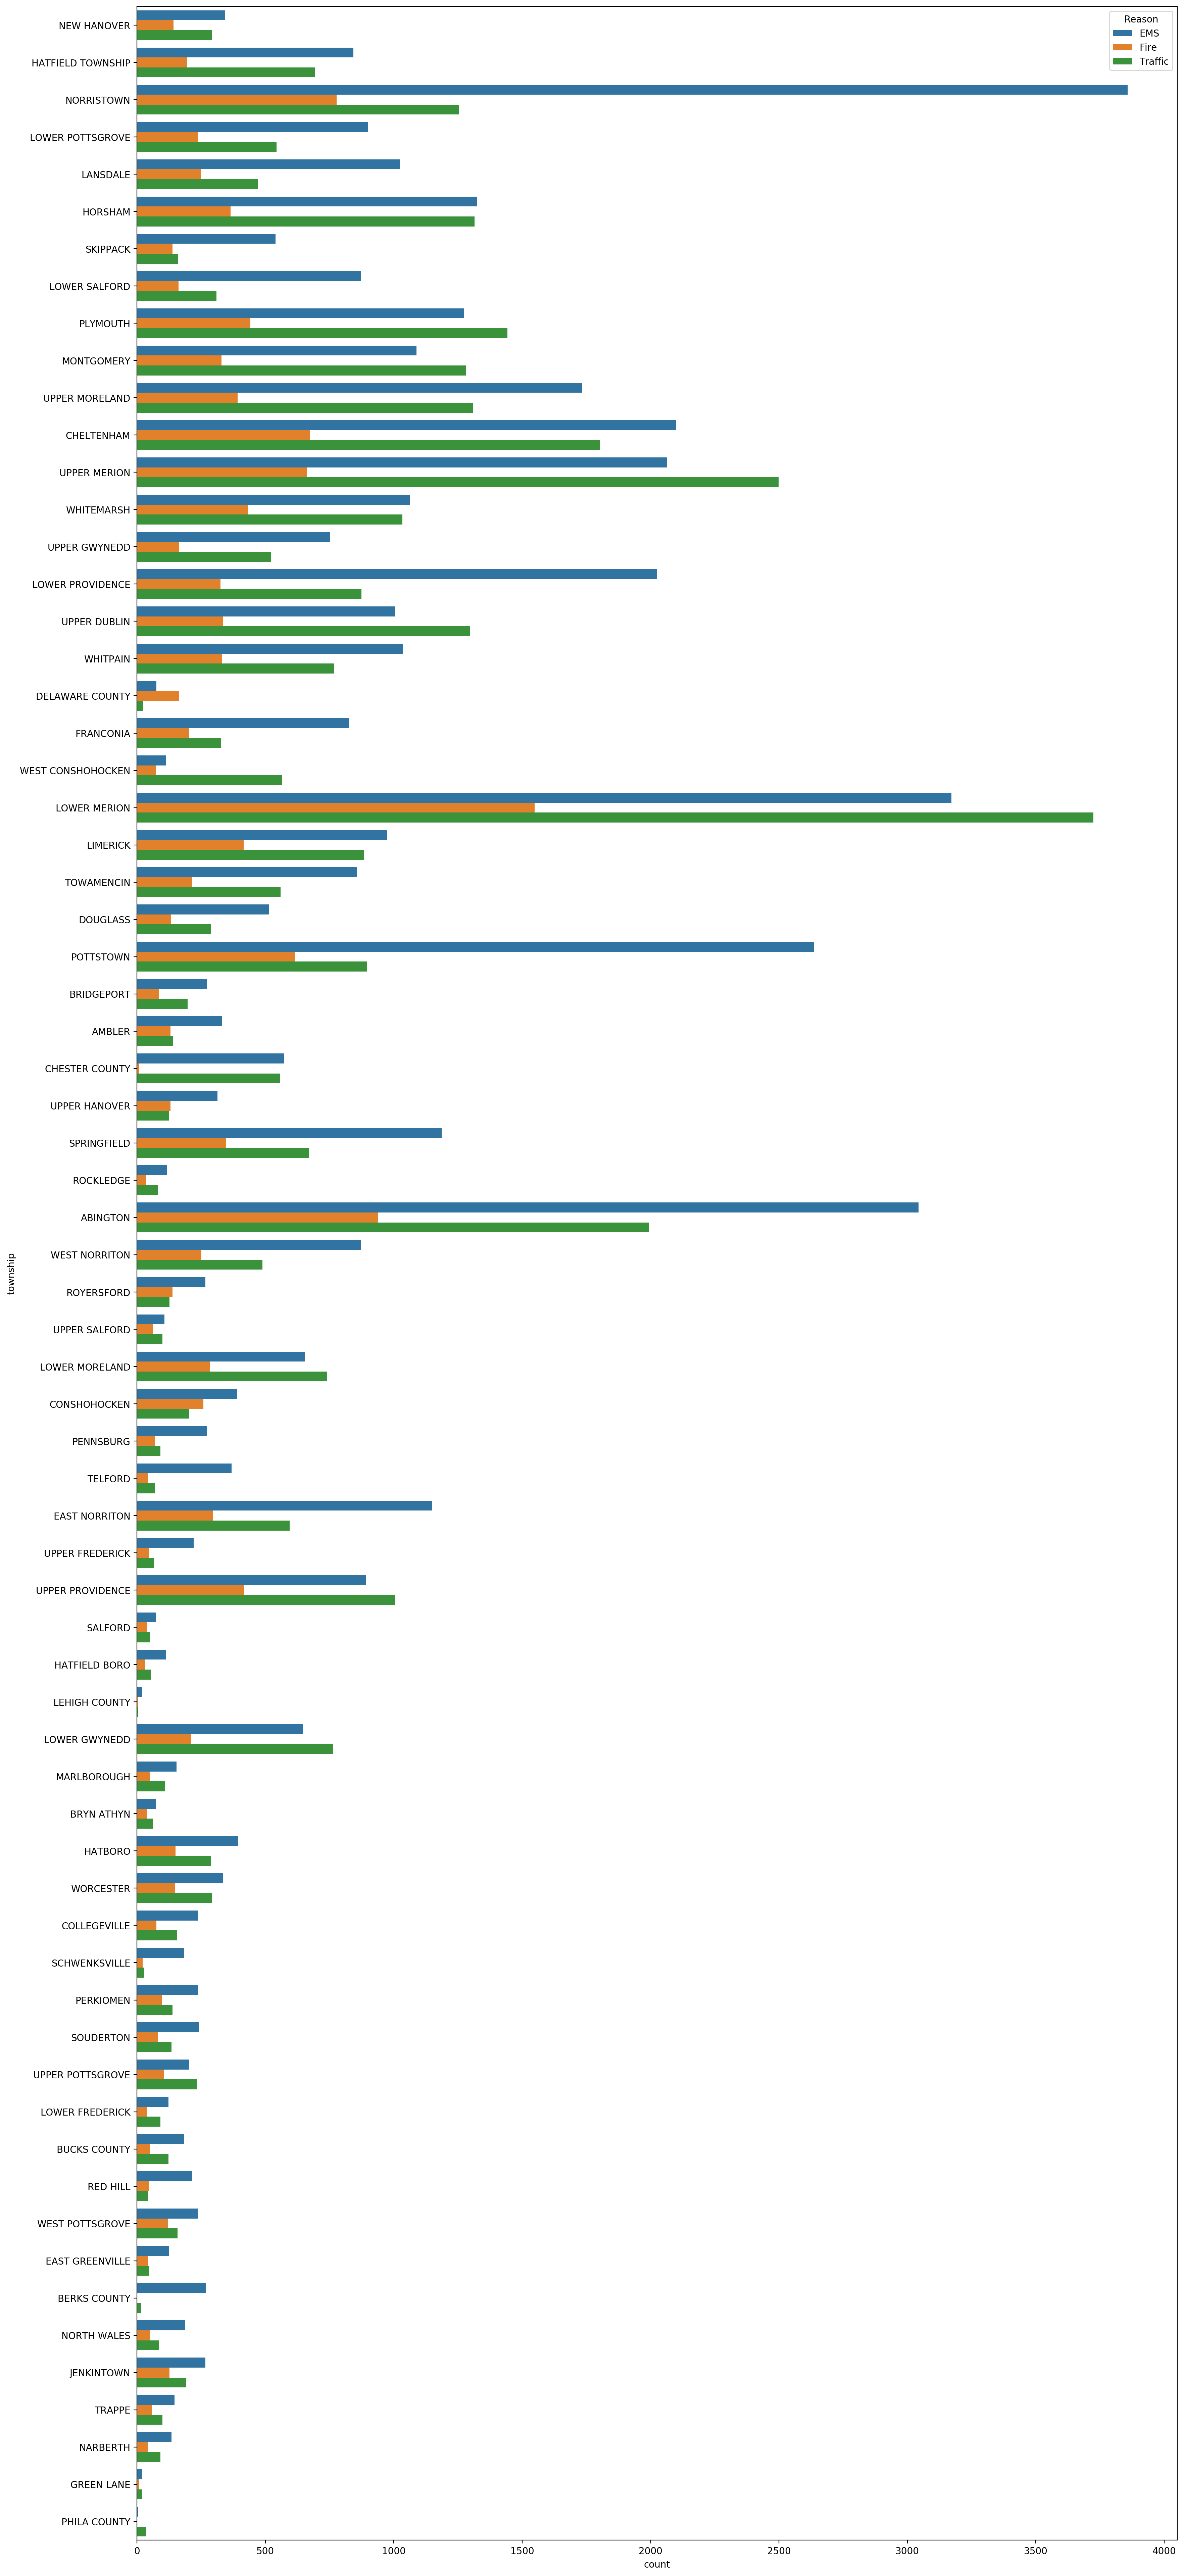

In [28]:
plt.figure(figsize=(20,50), dpi=200)
sns.countplot(y='township',hue='Reason',data=df_clean);

In [29]:
byMonth=df_clean.groupby('Month').agg('count')
byMonth.reset_index(inplace=True)
byMonth

,Month,latitude,longitude,description,zip,title,time,township,address,e,Reason,Hour,Day of Week,Year,Date
0,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
5,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
6,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
7,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
8,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


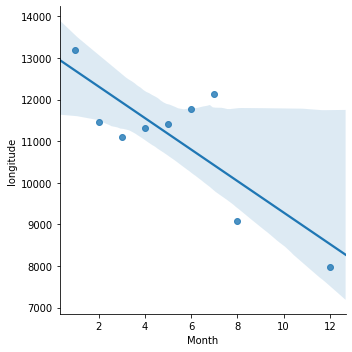

In [30]:
sns.lmplot(data=byMonth, x='Month', y='longitude')

In [31]:
byHour=df_clean.groupby('Hour').agg('count')
byHour.reset_index(inplace=True)
byHour.head()

,Hour,latitude,longitude,description,zip,title,time,township,address,e,Reason,Month,Day of Week,Year,Date
0,0,2112,2112,2112,2112,2112,2112,2109,2105,2112,2112,2112,2112,2112,2112
1,1,1721,1721,1721,1721,1721,1721,1718,1714,1721,1721,1721,1721,1721,1721
2,2,1549,1549,1549,1549,1549,1549,1548,1543,1549,1549,1549,1549,1549,1549
3,3,1435,1435,1435,1435,1435,1435,1433,1431,1435,1435,1435,1435,1435,1435
4,4,1418,1418,1418,1418,1418,1418,1418,1415,1418,1418,1418,1418,1418,1418


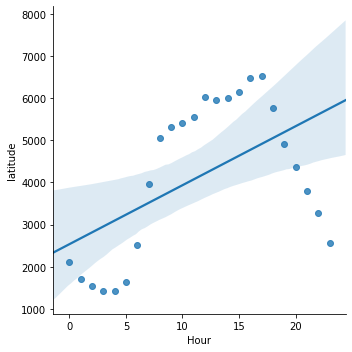

In [32]:
sns.lmplot(data=byHour, x='Hour', y='latitude')

In [33]:
byDate=df_clean.groupby('Date').agg('count')
byDate.reset_index(inplace=True)
byDate.head()

,Date,latitude,longitude,description,zip,title,time,township,address,e,Reason,Hour,Month,Day of Week,Year
0,2015-12-10,115,115,115,115,115,115,115,113,115,115,115,115,115,115
1,2015-12-11,396,396,396,396,396,396,395,391,396,396,396,396,396,396
2,2015-12-12,403,403,403,403,403,403,403,401,403,403,403,403,403,403
3,2015-12-13,319,319,319,319,319,319,319,317,319,319,319,319,319,319
4,2015-12-14,447,447,447,447,447,447,446,445,447,447,447,447,447,447


Text(0.5, 1.0, 'Number of 911 calls per date')

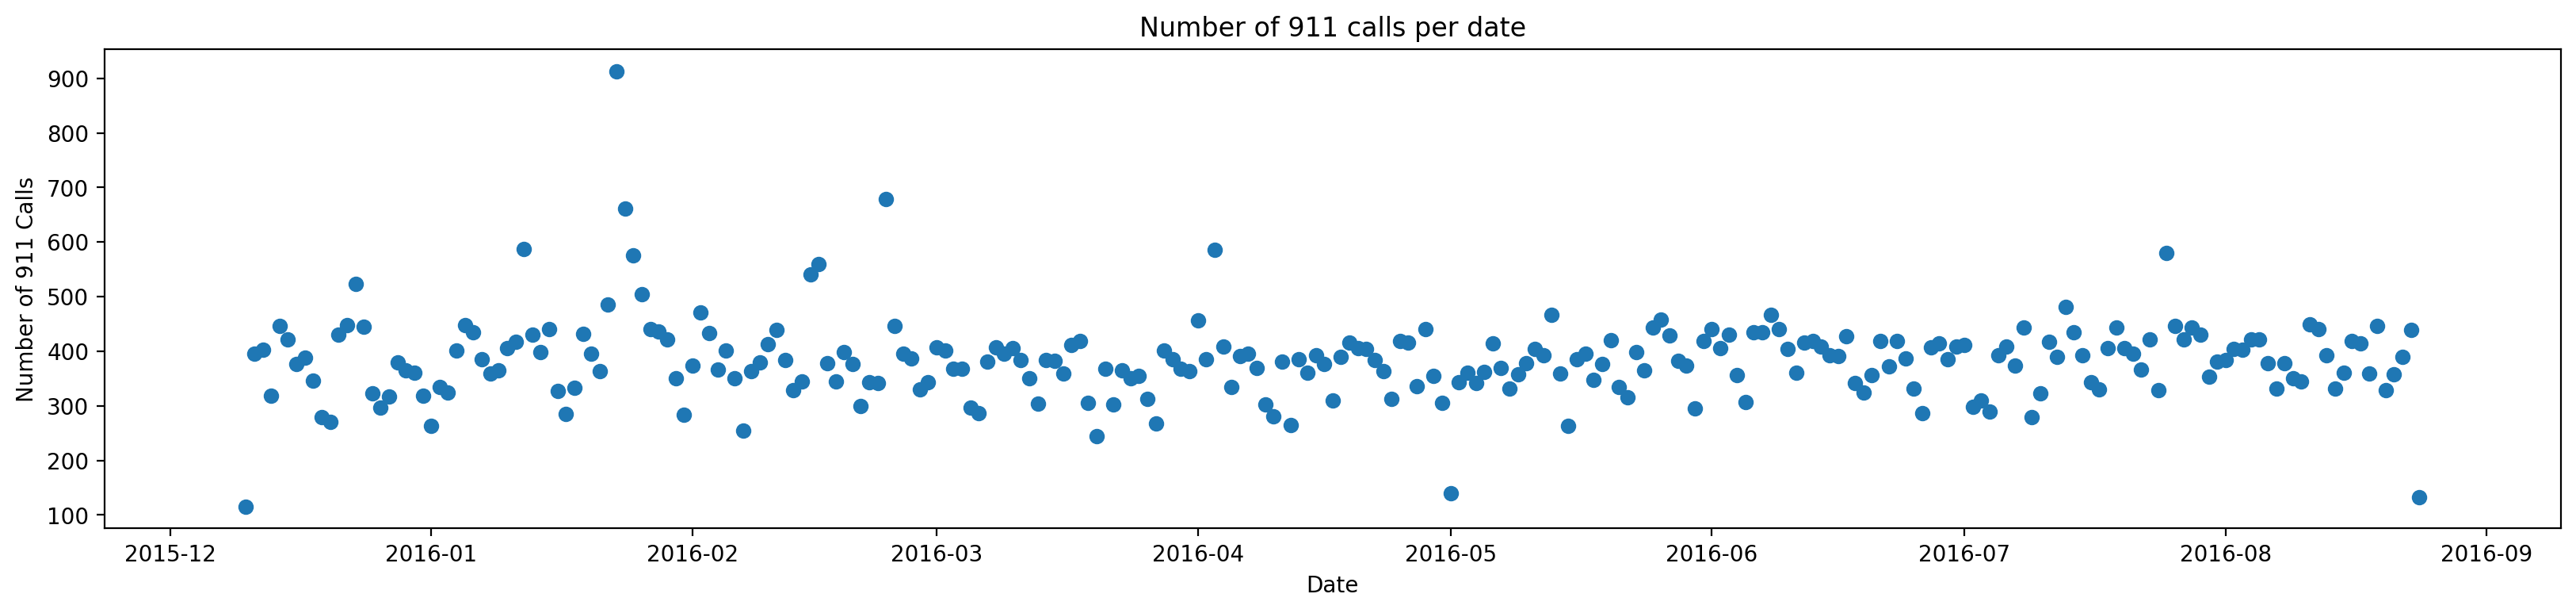

In [34]:
plt.figure(figsize=(20,4), dpi=200)
plt.scatter(data=byDate, x='Date', y='Reason')
plt.xlabel("Date")
plt.ylabel("Number of 911 Calls")
plt.title("Number of 911 calls per date")

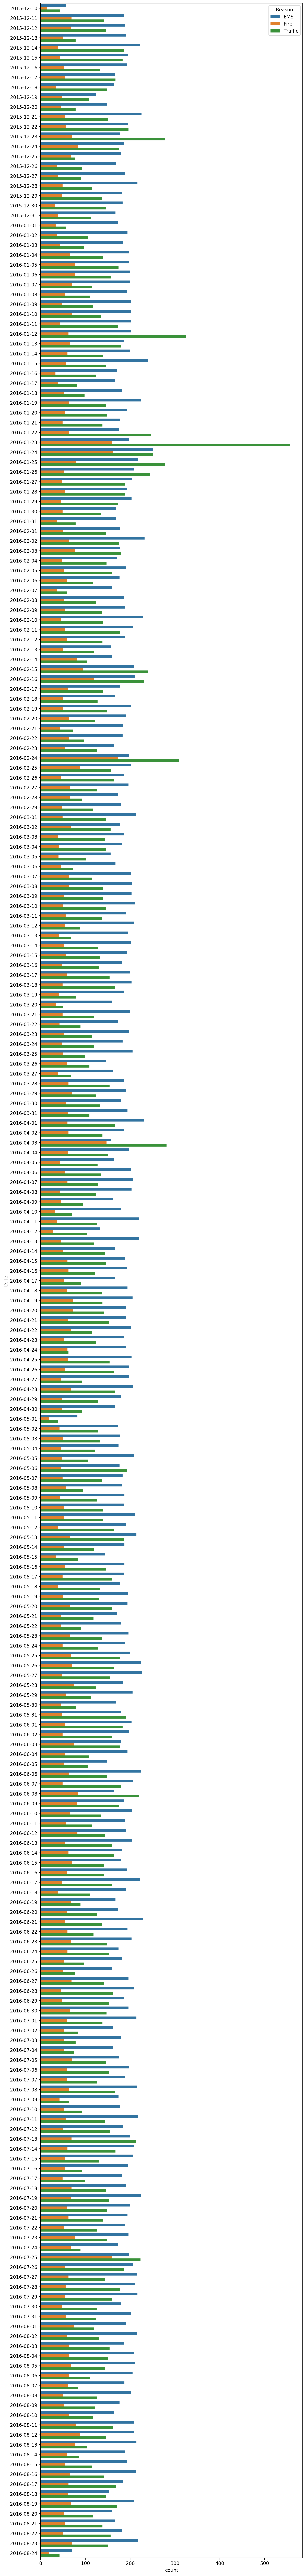

In [35]:
plt.figure(figsize=(10,100), dpi=200)
sns.countplot(y='Date',hue='Reason',data=df_clean)
